# Chapter 6: Advanced Optimization
## The Traveling Salesman Problem

In [116]:
import numpy as np
random_seed = 1729
np.random.seed(random_seed)
N = 40
x = np.random.rand(N)
y = np.random.rand(N)
points = zip(x,y)
cities = list(points)

In [117]:
print(cities)

[(0.21215859519373315, 0.1421890509660515), (0.25901824052776146, 0.4415438502354807), (0.42352187994602863, 0.6384708617951832), (0.7196610137879806, 0.4541115917001236), (0.6922509256107934, 0.9795099465634718), (0.7281748161649396, 0.497003900057289), (0.2875498733527475, 0.987892114481641), (0.25408333020469553, 0.9438765028592432), (0.9609289991025697, 0.31254425748246295), (0.5652066087690863, 0.527268363065508), (0.0669470282293596, 0.743806143933605), (0.7333909009768429, 0.9080655744313583), (0.5097899289931794, 0.9438536218932465), (0.2275735994122996, 0.8300476280141759), (0.34145108286419, 0.2560140784278434), (0.5119931773955035, 0.04764567825851673), (0.9607228565214858, 0.3459590815475251), (0.6140544248143194, 0.22568954246099482), (0.7524005962652125, 0.5691469284846282), (0.9003957980585882, 0.6872708115099813), (0.3471312754415167, 0.3122221374834556), (0.6550253186247254, 0.6860405486796042), (0.39706771454841694, 0.6586237030125843), (0.12686022007415232, 0.7679194

In [118]:
itinerary = list(range(0,N))
initial_itinerary = list(range(0,N))

In [119]:
print(itinerary)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [120]:
lines=[]
for j in range(0,len(itinerary) - 1):
    lines.append([cities[itinerary[j]],cities[itinerary[j + 1]]])

In [121]:
print(lines)

[[(0.21215859519373315, 0.1421890509660515), (0.25901824052776146, 0.4415438502354807)], [(0.25901824052776146, 0.4415438502354807), (0.42352187994602863, 0.6384708617951832)], [(0.42352187994602863, 0.6384708617951832), (0.7196610137879806, 0.4541115917001236)], [(0.7196610137879806, 0.4541115917001236), (0.6922509256107934, 0.9795099465634718)], [(0.6922509256107934, 0.9795099465634718), (0.7281748161649396, 0.497003900057289)], [(0.7281748161649396, 0.497003900057289), (0.2875498733527475, 0.987892114481641)], [(0.2875498733527475, 0.987892114481641), (0.25408333020469553, 0.9438765028592432)], [(0.25408333020469553, 0.9438765028592432), (0.9609289991025697, 0.31254425748246295)], [(0.9609289991025697, 0.31254425748246295), (0.5652066087690863, 0.527268363065508)], [(0.5652066087690863, 0.527268363065508), (0.0669470282293596, 0.743806143933605)], [(0.0669470282293596, 0.743806143933605), (0.7333909009768429, 0.9080655744313583)], [(0.7333909009768429, 0.9080655744313583), (0.509789

In [122]:
def genlines(cities,itinerary):
    lines = []
    for j in range(0, len(itinerary) - 1):
        lines.append([cities[itinerary[j]],cities[itinerary[j + 1]]])
    return(lines)

import math
def howfar(lines):
    distance = 0
    for j in range(0,len(lines)):
        distance += math.sqrt(abs(lines[j][1][0] - lines[j][0][0])**2 + abs(lines[j][1][1] - lines[j][0][1])**2)
    return(distance)

totaldistance = howfar(genlines(cities,itinerary))

In [123]:
print(totaldistance)

16.808756356994223


In [124]:
import matplotlib.collections as mc # I need to learn a lot more about Matplotlib.
import matplotlib.pylab as pl
def plotitinerary(cities, itin,plottitle,thename):
    lc = mc.LineCollection(genlines(cities, itin), linewidths=2)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    pl.scatter(x, y)
    pl.title(plottitle)
    pl.xlabel('X Coordinate')
    pl.ylabel('Y Coordinate')
    pl.savefig(str(thename) + '.png')
    pl.close()

In [125]:
plotitinerary(cities, itinerary, 'TSP - Random Itinerary', 'figure2')

### The Nearest Neighbor Algorithm

In [126]:
# The distance between point and the jth element of cities by Pythagoras. 
# Remember that this is not always the appropriate way to measure geometrical distance.
# Consider the Pythagorean distance around the corner of a city block: not the right distance between points if you're a car.
# Remember to use k-Nearest Neighbor to avoid this inaccuracy.

point = [0.5,0.5]
j = 10
distance = math.sqrt((point[0] - cities[j][0])**2 + (point[1] - cities[j][1])**2)
print(cities[j])
print(cities[j][0])
print(cities[j][1])
print(distance)

(0.0669470282293596, 0.743806143933605)
0.0669470282293596
0.743806143933605
0.49696711378033537


In [127]:
def findnearest(cities,idx,nnitinerary):
    point = cities[idx]
    mindistance = float('inf')
    minidx = - 1
    for j in range(0,len(cities)):
        distance = math.sqrt((point[0] - cities[j][0])**2 + (point[1] - cities[j][1])**2)
        if distance < mindistance and distance > 0 and j not in nnitinerary: # Cool, I didn't know you could use this many conditionals at one time.
            mindistance = distance
            minidx = j
    return(minidx)

def donn(cities,N): # "do nearest neighbor"
    nnitinerary = [0]
    for j in range(0,N - 1):
        next = findnearest(cities,nnitinerary[len(nnitinerary) - 1],nnitinerary)
        nnitinerary.append(next)
    return(nnitinerary)

In [128]:
plotitinerary(cities,donn(cities,N),'TSP - Nearest Neighbor', 'figure3')
nnDist = howfar(genlines(cities,donn(cities,N)))
print('The salesman traveled {:.2f} using Nearest Neighbor, versus {:.2f} in a random itinerary.'.format(nnDist,totaldistance))
print('The Nearest Neighbor trip distance is {:.2f} of the distance of a random itinerary.'.format((nnDist/totaldistance)))

The salesman traveled 6.29 using Nearest Neighbor, versus 16.81 in a random itinerary.
The Nearest Neighbor trip distance is 0.37 of the distance of a random itinerary.


Let's tweak the model. Suppose that you think you could improve the saleman's trip by switching the visits to city 6 and city 30.

In [129]:
new_itinerary = [0, 1, 2, 3, 4, 5, 30, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 6, 31, 32, 33, 34, 35, 36, 37, 38, 39]

In [130]:
print(howfar(genlines(cities,initial_itinerary)))
print(howfar(genlines(cities,new_itinerary)))

16.808756356994223
16.791583620116665


In [136]:
# Why iterate through brute force when we can use an algorithm?
# This function makes a small change to an itinerary, compares it to the original itinerary, and returns whichever itinerary is shorter.

def perturb(cities,itinerary):
    neighborids1 = math.floor(np.random.rand() * (len(itinerary))) # Floor is necessary because this expression returns a float.
    neighborids2 = math.floor(np.random.rand() * (len(itinerary)))

    itinerary2 = itinerary.copy()

    itinerary2[neighborids1] = itinerary[neighborids2]
    itinerary2[neighborids2] = itinerary[neighborids1]

    distance1 = howfar(genlines(cities,itinerary))
    distance2 = howfar(genlines(cities,itinerary2))

    itinerarytoreturn = itinerary.copy()

    if(distance1 > distance2):
        itinerarytoreturn = itinerary2.copy()

    return(itinerarytoreturn.copy())


In [137]:
# Perturb search algorithm. 
# Guided search through many possible monotonically-decreasing itineraries.
itinerary = list(range(0,N))

np.random.seed(random_seed)
itinerary_ps = itinerary.copy()
for n in range(0,len(itinerary) * 50000): # Increasing the itinerary multiplier by 10 increases the solution time by a factor of 10.
    itinerary_ps = perturb(cities, itinerary_ps)

print(howfar(genlines(cities,itinerary_ps)))

7.37962855396978


In [138]:
print(itinerary_ps)

[8, 16, 30, 11, 4, 7, 25, 10, 23, 13, 29, 38, 24, 20, 14, 36, 17, 9, 28, 34, 32, 27, 0, 1, 2, 22, 6, 31, 12, 21, 19, 35, 18, 5, 3, 37, 15, 33, 39, 26]


The nearest neighbor and `perturb` search algorithms are *greedy*. The fact that they make locally-optimal choices at each step means they are myopic to globally-optimal choices. The TSP may need to perturb to locally-worse choices to result in a globally-optimal route.

We use a forcing function to provide feedback about finding the global optimum. The book uses the analogy of time-limiting a for the highest hill in an area knowing that it will be colder when the time is up. The temperature function is `temperature = lambda t: 1/(t+1)`. 
> This temperature is used as a schedule that will govern our optimization: our willingness to go down is porportional to the temperature at any given time.

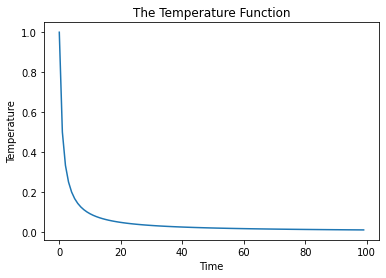

In [133]:
temperature = lambda t: 1/(t+1)
import matplotlib.pyplot as plt
ts = list(range(0,100))
plt.plot(ts, [temperature(t) for t in ts])
plt.title('The Temperature Function')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

## Simulated Annealing
Consider the TSP solution space. Bringing the problem together with the temperature function, the search for a global peak among local peaks, and the `perturb` search algorithm, we can find an optimal itinerary. (What other forcing functions are commonly used in optimization?) Simulated annealing is a modified form of the `perturb` search algorithm. The difference is that simulated annealing will accept itinerary changes that increase the distance traveled in order to avoid local optimization, depending on the current temperature.

Why does this algorithm share a name with a metallurgical process? During annealing, bonds in the metal are broken under high heat. As the metal cools, new bonds form, leading the metal to have different, more desirable properties. This algorithm "breaks" things by accepting worse solutions in the hope that as the temperature cools, we can fix them in a way that makes them better than before. This is a *metaphor-based metaheuristic*: it takes an existing process in nature or human society and finds a way to adapt it to solve an optimization problem.

In [134]:
# Modified perturb algorithm

def perturb_sa1(cities,itinerary,time):
    neighborids1 = math.floor(np.random.rand() * (len(itinerary))) # Floor is necessary because this expression returns a float.
    neighborids2 = math.floor(np.random.rand() * (len(itinerary)))

    itinerary2 = itinerary.copy()

    itinerary2[neighborids1] = itinerary[neighborids2]
    itinerary2[neighborids2] = itinerary[neighborids1]

    distance1 = howfar(genlines(cities,itinerary))
    distance2 = howfar(genlines(cities,itinerary2))

    itinerarytoreturn = itinerary.copy()

    randomdraw = np.random.rand()
    temperature = 1/((time/1000) + 1)

    if((distance2 > distance1 and (randomdraw) < (temperature)) or (distance1 > distance2)):
        itinerarytoreturn = itinerary2.copy()

    return(itinerarytoreturn.copy())

In [139]:
itinerary = list(range(0,N))
np.random.seed(random_seed)

itinerary_sa = itinerary.copy()
for n in range(0,len(itinerary) * 50000):
    itinerary_sa = perturb_sa1(cities,itinerary_sa,n)

print(howfar(genlines(cities,itinerary))) # random itinerary
print(howfar(genlines(cities,itinerary_ps))) # perturb search
print(howfar(genlines(cities,itinerary_sa))) # simulated annealing
print(howfar(genlines(cities,donn(cities, N)))) # nearest neighbor

16.808756356994223
7.37962855396978
16.808756356994223
6.29000579854535


Let's tune the algorithm! `perturb()` switches the place of two cities, but another method is to reverse some portion of the itinerary, or move an entire section from one spot in the itinerary to another.

In [140]:
# Example one: reversing part of the itinerary
small = 10
big = 20
itinerary = list(range(0,N))
itinerary[small:big] = itinerary[small:big][::-1] # Reverses the order of elements in itinerary from index `small` to index `big`
print(itinerary)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [145]:
# Example two: moving a part of the itinerary
small = 1
big = 5
itinerary = list(range(0,10))
tempitin = itinerary[small:big]
del(itinerary[small:big])
np.random.seed(random_seed + 1)
neighborids3 = math.floor(np.random.rand() * (len(itinerary)))
for j in range(0,len(tempitin)):
    itinerary.insert(neighborids3 + j,tempitin[j])

print(neighborids3)
print(itinerary)

5
[0, 5, 6, 7, 8, 1, 2, 3, 4, 9]


In [149]:
# Modified simulated annealing algorithm
# Includes tuning methods listed above

def perturb_sa2(cities,itinerary,time):
    neighborids1 = math.floor(np.random.rand() * (len(itinerary))) # Floor is necessary because this expression returns a float.
    neighborids2 = math.floor(np.random.rand() * (len(itinerary)))

    itinerary2 = itinerary.copy()

    randomdraw2 = np.random.rand()
    small = min(neighborids1, neighborids2)
    big = max(neighborids1,neighborids2)
    if(randomdraw2 >= 0.55):
        itinerary2[small:big] = itinerary2[small:big][:: - 1]
    elif(randomdraw2 < 0.45):
        tempitin = itinerary[small:big]
        del(itinerary2[small:big])
        neighborids3 = math.floor(np.random.rand() * (len(itinerary)))
        for j in range(0,len(tempitin)):
            itinerary2.insert(neighborids3 + j,tempitin[j])
    else:
        itinerary2[neighborids1] = itinerary[neighborids2]
        itinerary2[neighborids2] = itinerary[neighborids1]

    distance1 = howfar(genlines(cities,itinerary))
    distance2 = howfar(genlines(cities,itinerary2))

    itinerarytoreturn = itinerary.copy()

    randomdraw = np.random.rand()
    temperature = 1/((time/1000) + 1)

    scale = 3.5
    if((distance2 > distance1 and (randomdraw) < (math.exp(scale*(distance1-distance2)) * temperature)) or (distance1 > distance2)): # Willingness to accept worse itinerary depends not only on temperature but also the effect on the itinerary distance.
        itinerarytoreturn = itinerary2.copy()

    return(itinerarytoreturn.copy())

In [151]:
# Modified simulated annealing algorithm, v2
# Includes storing the best itinerary and allowing resets

def perturb_sa3(cities,itinerary,time,maxitin): # maxitin = number of times one intends to call the function
    neighborids1 = math.floor(np.random.rand() * (len(itinerary))) # Floor is necessary because this expression returns a float.
    neighborids2 = math.floor(np.random.rand() * (len(itinerary)))
    global mindistance # Define the minimum distance achieved so far
    global minitinerary # Define the itinerary that achieved the minimum distance
    global minidx # Define the time at which the itinerary was achieved

    itinerary2 = itinerary.copy()

    randomdraw2 = np.random.rand()
    small = min(neighborids1, neighborids2)
    big = max(neighborids1,neighborids2)
    if(randomdraw2 >= 0.55):
        itinerary2[small:big] = itinerary2[small:big][:: - 1]
    elif(randomdraw2 < 0.45):
        tempitin = itinerary[small:big]
        del(itinerary2[small:big])
        neighborids3 = math.floor(np.random.rand() * (len(itinerary)))
        for j in range(0,len(tempitin)):
            itinerary2.insert(neighborids3 + j,tempitin[j])
    else:
        itinerary2[neighborids1] = itinerary[neighborids2]
        itinerary2[neighborids2] = itinerary[neighborids1]

    distance1 = howfar(genlines(cities,itinerary))
    distance2 = howfar(genlines(cities,itinerary2))

    itinerarytoreturn = itinerary.copy()

    randomdraw = np.random.rand()
    temperature = 1/((time/1000) + 1)

    scale = 3.5
    if((distance2 > distance1 and (randomdraw) < (math.exp(scale*(distance1-distance2)) * temperature)) or (distance1 > distance2)): # Willingness to accept worse itinerary depends not only on temperature but also the effect on the itinerary distance.
        itinerarytoreturn = itinerary2.copy()

    reset = True
    resetthresh = 0.04 # How long we should wait before resetting. What are the units of this threshold?
    if (reset and (time - minidx) > (maxitin * resetthresh)): # If the time progresses very far without finding anything better than minitinerary, we can conclude that the changes we made after that point were mistakes and we reset to the best itinerary
        itinerarytoreturn = minitinerary # Reset to the last known minimum itinerary
        minidx = time

    if(howfar(genlines(cities,itinerarytoreturn)) < mindistance):
        mindistance = howfar(genlines(cities,itinerary2))
        minitinerary = itinerarytoreturn
        minidx = time

    return(itinerarytoreturn.copy())

In [152]:
# Performs the full simulated annealing process and returns an optimized itinerary

def siman(itinerary,cities):
    newitinerary = itinerary.copy()
    global mindistance
    global minitinerary
    global minidx
    mindistance = howfar(genlines(cities,itinerary))
    minitinerary = itinerary
    minidx = 0

    maxitin = len(itinerary) * 50000
    for t in range(0,maxitin):
        newitinerary = perturb_sa3(cities, newitinerary,t,maxitin)

    return(newitinerary.copy())

In [153]:
np.random.seed(random_seed)
itinerary = list(range(N))
nnitin = donn(cities,N)
nnresult = howfar(genlines(cities,nnitin))
simanitinerary = siman(itinerary,cities)
simanresult = howfar(genlines(cities,simanitinerary))
print(nnresult)
print(simanresult)
print(simanresult/nnresult)

6.29000579854535
4.8465836404472995
0.7705213310881428


In [155]:
plotitinerary(cities,simanitinerary,'Traveling Salesman Itinerary - Simulated Annealing','figure5')